## UNITED AIRLINES ASSIGNMENT PART A AND PART B
## BY NIHAR MITTAL AND RISHABH BHARDWAJ

In [19]:
%pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing all of the files and DataFrames. 

In [1]:
import pandas as pd

calls_df = pd.read_csv(r'.\callsf0d4f5a.csv')
customers_df = pd.read_csv(r'.\customers2afd6ea.csv')
reasons_df = pd.read_csv(r'.\reason18315ff.csv')
sentiment_df = pd.read_csv(r'.\sentiment_statisticscc1e57a.csv')
test_df = pd.read_csv(r'.\testbc7185d.csv')

calls_head = calls_df.head()
customers_head = customers_df.head()
reasons_head = reasons_df.head()
sentiment_head = sentiment_df.head()
test_head = test_df.head()

calls_head, customers_head, reasons_head, sentiment_head, test_head


(      call_id  customer_id  agent_id call_start_datetime  \
 0  4667960400   2033123310    963118     7/31/2024 23:56   
 1  1122072124   8186702651    519057       8/1/2024 0:03   
 2  6834291559   2416856629    158319     7/31/2024 23:59   
 3  2266439882   1154544516    488324       8/1/2024 0:05   
 4  1211603231   5214456437    721730       8/1/2024 0:04   
 
   agent_assigned_datetime call_end_datetime  \
 0           8/1/2024 0:03     8/1/2024 0:34   
 1           8/1/2024 0:06     8/1/2024 0:18   
 2           8/1/2024 0:07     8/1/2024 0:26   
 3           8/1/2024 0:10     8/1/2024 0:17   
 4           8/1/2024 0:14     8/1/2024 0:23   
 
                                      call_transcript  
 0  \n\nAgent: Thank you for calling United Airlin...  
 1  \n\nAgent: Thank you for calling United Airlin...  
 2  \n\nAgent: Thank you for calling United Airlin...  
 3  \n\nAgent: Thank you for calling United Airlin...  
 4  \n\nAgent: Thank you for calling United Airlin...  ,
    c

Converted the datetime columns to actual datetime objects for accurate time difference calculations, then

Calculated AHT (Average Handle Time) as the difference between agent_assigned_datetime and call_end_datetime and 

Calculated AST (Average Speed to Answer) as the difference between call_start_datetime and agent_assigned_datetime


ALTERNATIVE SQL QUERY:

SELECT 
    call_id, 
    TIMESTAMPDIFF(SECOND, agent_assigned_datetime, call_end_datetime) AS AHT,
    TIMESTAMPDIFF(SECOND, call_start_datetime, agent_assigned_datetime) AS AST
FROM 
    calls;

In [2]:
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

calls_df['AHT'] = (calls_df['call_end_datetime'] - calls_df['agent_assigned_datetime']).dt.total_seconds()

calls_df['AST'] = (calls_df['agent_assigned_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()

calls_df[['call_id', 'AHT', 'AST']].head()


,call_id,AHT,AST
0,4667960400,1860.0,420.0
1,1122072124,720.0,180.0
2,6834291559,1140.0,480.0
3,2266439882,420.0,300.0
4,1211603231,540.0,600.0


Merging the pdfs according to our usage.

ALTERNATIVE SQL QUERY:

SELECT *
FROM calls c
LEFT JOIN reasons r
ON c.call_id = r.call_id
LEFT JOIN sentiment s
ON c.call_id = s.call_id
LEFT JOIN customers cu
ON c.customer_id = cu.customer_id;

In [3]:
merged_df = pd.merge(calls_df, reasons_df, on='call_id', how='left')

merged_df = pd.merge(merged_df, sentiment_df, on='call_id', how='left')

merged_df = pd.merge(merged_df, customers_df, on='customer_id', how='left')

merged_df.head()


,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_name,elite_level_code
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,Matthew Foster,4.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0,Booking,519057,calm,neutral,0.02,0.35,Tammy Walters,NaN
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0,IRROPS,158319,neutral,polite,-0.13,0.32,Jeffery Dixon,NaN
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0,Upgrade,488324,neutral,frustrated,-0.20,0.20,David Wilkins,2.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0,Seating,721730,neutral,polite,-0.05,0.35,Elizabeth Daniels,0.0


## CHECKING UNIQUE VALUES PRESENT IN THE PRIMARY_CALL_REASON

In [4]:
def get_unique_values(df, column_name):
    unique_values = df[column_name].unique()
    return unique_values

unique_primary_call_reasons = get_unique_values(merged_df, 'primary_call_reason')
unique_primary_call_reasons


array(['Voluntary  Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage   Plus', 'Checkout', nan, 'Voluntary   Change',
       'Post Flight', 'Check In', 'Other  Topics', 'Communications',
       'Schedule Change', 'Products & Services', 'IRROPS  ',
       'Digital   Support', 'Seating  ', 'Disability',
       'Unaccompanied Minor', ' Baggage', 'Traveler  Updates',
       'Communications  ', 'ETC', 'Upgrade  ', 'Unaccompanied Minor  ',
       'Voluntary Change', 'Voluntary Change  ', 'Checkout  ',
       'Mileage Plus', 'Mileage Plus  ', 'Booking  ', 'Baggage  ',
       'Post-Flight', 'Post-Flight  ', 'Schedule Change  ', 'Baggage',
       'Traveler Updates', 'Voluntary Cancel', 'Check-In',
       'Products and Services', 'Check-In  ', 'Other Topics',
       'Other Topics  ', 'ETC  ', 'Disability  ', 'Digital Support',
       'Digital Support  ', 'Voluntary Cancel  ',
       'Products and Services  ', 'Traveler Updates  ',
       'Traveler   Updates', 'Digital  Support',

Function to clean and standardize the primary_call_reason values


In [5]:
def clean_call_reason(column):
    column = column.str.strip()
    column = column.str.replace(r'\s+', ' ', regex=True)
    return column

merged_df['primary_call_reason'] = clean_call_reason(merged_df['primary_call_reason'])

cleaned_unique_primary_call_reasons = get_unique_values(merged_df, 'primary_call_reason')
cleaned_unique_primary_call_reasons


array(['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage Plus', 'Checkout', nan, 'Voluntary Change', 'Post Flight',
       'Check In', 'Other Topics', 'Communications', 'Schedule Change',
       'Products & Services', 'Digital Support', 'Disability',
       'Unaccompanied Minor', 'Baggage', 'Traveler Updates', 'ETC',
       'Post-Flight', 'Check-In', 'Products and Services'], dtype=object)

AS WE CAN SEE SOMETHINGS

In [6]:
def standardize_call_reasons(column):
    standardization_dict = {
        'Check In': 'Check-In',
        'Post Flight': 'Post-Flight',
        'Products & Services': 'Products and Services'
    }
    
    column = column.replace(standardization_dict)
    
    return column

merged_df['primary_call_reason'] = standardize_call_reasons(merged_df['primary_call_reason'])

final_unique_primary_call_reasons = get_unique_values(merged_df, 'primary_call_reason')
final_unique_primary_call_reasons


array(['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage Plus', 'Checkout', nan, 'Voluntary Change', 'Post-Flight',
       'Check-In', 'Other Topics', 'Communications', 'Schedule Change',
       'Products and Services', 'Digital Support', 'Disability',
       'Unaccompanied Minor', 'Baggage', 'Traveler Updates', 'ETC'],
      dtype=object)

## PART A:

Long average handle time (AHT) affects both efficiency and customer satisfaction. Explore the factors contributing to extended call durations, such as agent performance, call types, and sentiment. Identify key drivers of long AHT and AST, especially during high volume call periods. Additionally, could you quantify the percentage difference between the average handling time for the most frequent and least frequent call reasons?

Analyzed the distribution of AHT by call reason to identify the most and least frequent reasons
Calculated the percentage difference between the most frequent and least frequent call reasons in terms of AHT

ALT SQL QUERY:

WITH aht_by_reason AS (
    SELECT 
        primary_call_reason, 
        AVG(TIMESTAMPDIFF(SECOND, agent_assigned_datetime, call_end_datetime)) AS mean_AHT,
        COUNT(*) AS reason_count
    FROM calls c
    LEFT JOIN reasons r ON c.call_id = r.call_id
    GROUP BY primary_call_reason
    ORDER BY reason_count DESC
),
most_frequent_reason AS (
    SELECT mean_AHT 
    FROM aht_by_reason 
    ORDER BY reason_count DESC 
    LIMIT 1
),
least_frequent_reason AS (
    SELECT mean_AHT 
    FROM aht_by_reason 
    ORDER BY reason_count ASC 
    LIMIT 1
)

SELECT 
    ((most_frequent_reason.mean_AHT - least_frequent_reason.mean_AHT) / least_frequent_reason.mean_AHT) * 100 AS aht_percentage_difference
FROM 
    most_frequent_reason, 
    least_frequent_reason;

In [7]:
aht_by_reason = merged_df.groupby('primary_call_reason')['AHT'].agg(['mean', 'count']).sort_values(by='count', ascending=False)

most_frequent_reason_aht = aht_by_reason.iloc[0]['mean']
least_frequent_reason_aht = aht_by_reason.iloc[-1]['mean']

aht_percentage_difference = ((most_frequent_reason_aht - least_frequent_reason_aht) / least_frequent_reason_aht) * 100

aht_by_reason.head()


,mean,count
primary_call_reason,,
IRROPS,785.116069,13311
Voluntary Change,639.153761,10848
Seating,474.994501,6365
Mileage Plus,995.573406,5851
Post-Flight,932.896074,4330


In [8]:
aht_by_reason.tail() 

,mean,count
primary_call_reason,,
Traveler Updates,393.233725,937
Other Topics,350.097800,818
Schedule Change,490.013680,731
Disability,292.109181,403
Unaccompanied Minor,519.230769,104


In [9]:
aht_percentage_difference

51.20753929498575

Grouped by primary call reason to analyze the mean AHT and AST for each reason

ALT SQL QUERY:

SELECT 
    primary_call_reason, 
    AVG(TIMESTAMPDIFF(SECOND, agent_assigned_datetime, call_end_datetime)) AS mean_AHT,
    AVG(TIMESTAMPDIFF(SECOND, call_start_datetime, agent_assigned_datetime)) AS mean_AST,
    COUNT(call_id) AS call_count
FROM calls c
LEFT JOIN reasons r ON c.call_id = r.call_id
GROUP BY primary_call_reason
ORDER BY call_count DESC;

In [10]:
aht_ast_by_reason = merged_df.groupby('primary_call_reason').agg({
    'AHT': 'mean',
    'AST': 'mean',
    'call_id': 'count'  
}).rename(columns={'call_id': 'call_count'}).sort_values(by='call_count', ascending=False)
aht_ast_by_reason


,AHT,AST,call_count
primary_call_reason,,,
IRROPS,785.116069,360.081136,13311
Voluntary Change,639.153761,540.486726,10848
Seating,474.994501,570.824823,6365
Mileage Plus,995.573406,361.015211,5851
Post-Flight,932.896074,569.431871,4330
Communications,826.718750,239.968750,3840
Products and Services,746.560624,302.448980,3332
Baggage,333.644068,542.097458,2832
Upgrade,632.344777,298.487947,2738


Analyzed agent performance by grouping by agent_id and calculating mean AHT and AST

ALT SQL QUERY:

SELECT 
    agent_id_x, 
    AVG(TIMESTAMPDIFF(SECOND, agent_assigned_datetime, call_end_datetime)) AS mean_AHT,
    AVG(TIMESTAMPDIFF(SECOND, call_start_datetime, agent_assigned_datetime)) AS mean_AST,
    COUNT(call_id) AS call_count
FROM calls c
LEFT JOIN reasons r ON c.call_id = r.call_id
GROUP BY agent_id_x
ORDER BY mean_AHT DESC
LIMIT 5;

In [11]:

aht_ast_by_agent = merged_df.groupby('agent_id_x').agg({
    'AHT': 'mean',
    'AST': 'mean',
    'call_id': 'count'
}).rename(columns={'call_id': 'call_count'}).sort_values(by='AHT', ascending=False)
aht_ast_by_agent.head()


,AHT,AST,call_count
agent_id_x,,,
102574,3600.0,480.0,2
506130,2880.0,420.0,1
255256,2620.0,280.0,3
140146,2620.0,360.0,3
558705,1980.0,420.0,2


Analyzed customer sentiment impact by grouping by average sentiment score ranges

ALT SQL QUERY:

WITH sentiment_bins AS (
    SELECT 
        call_id,
        CASE 
            WHEN average_sentiment > -1 AND average_sentiment <= -0.5 THEN 'Very Negative'
            WHEN average_sentiment > -0.5 AND average_sentiment <= 0 THEN 'Negative'
            WHEN average_sentiment > 0 AND average_sentiment <= 0.5 THEN 'Neutral'
            WHEN average_sentiment > 0.5 AND average_sentiment <= 1 THEN 'Positive'
        END AS sentiment_category
    FROM sentiment
)

SELECT 
    sentiment_category, 
    AVG(TIMESTAMPDIFF(SECOND, agent_assigned_datetime, call_end_datetime)) AS mean_AHT,
    AVG(TIMESTAMPDIFF(SECOND, call_start_datetime, agent_assigned_datetime)) AS mean_AST,
    COUNT(c.call_id) AS call_count
FROM calls c
LEFT JOIN sentiment_bins s ON c.call_id = s.call_id
GROUP BY sentiment_category;

In [12]:

sentiment_bins = pd.cut(merged_df['average_sentiment'], bins=[-1, -0.5, 0, 0.5, 1], labels=['Very Negative', 'Negative', 'Neutral', 'Positive'])
aht_ast_by_sentiment = merged_df.groupby(sentiment_bins).agg({
    'AHT': 'mean',
    'AST': 'mean',
    'call_id': 'count'
}).rename(columns={'call_id': 'call_count'})
aht_ast_by_sentiment

C:\Users\Nihar\AppData\Local\Temp\ipykernel_740\109044545.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aht_ast_by_sentiment = merged_df.groupby(sentiment_bins).agg({


,AHT,AST,call_count
average_sentiment,,,
Very Negative,362.046908,427.036247,469
Negative,739.709745,433.646699,46442
Neutral,626.499696,443.528267,24675
Positive,215.294118,463.764706,85


## SOME VISUALISATIONS

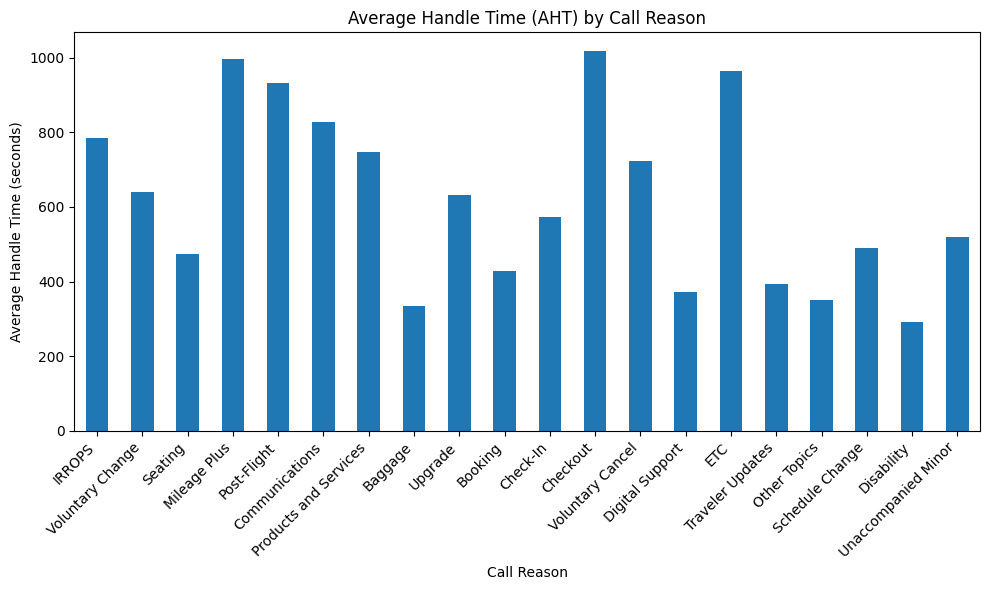

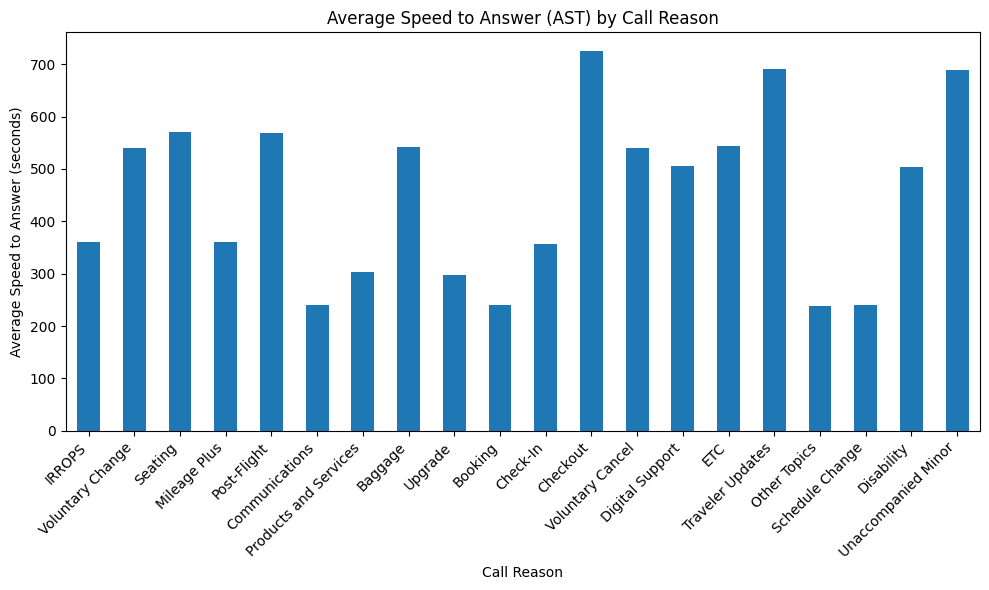

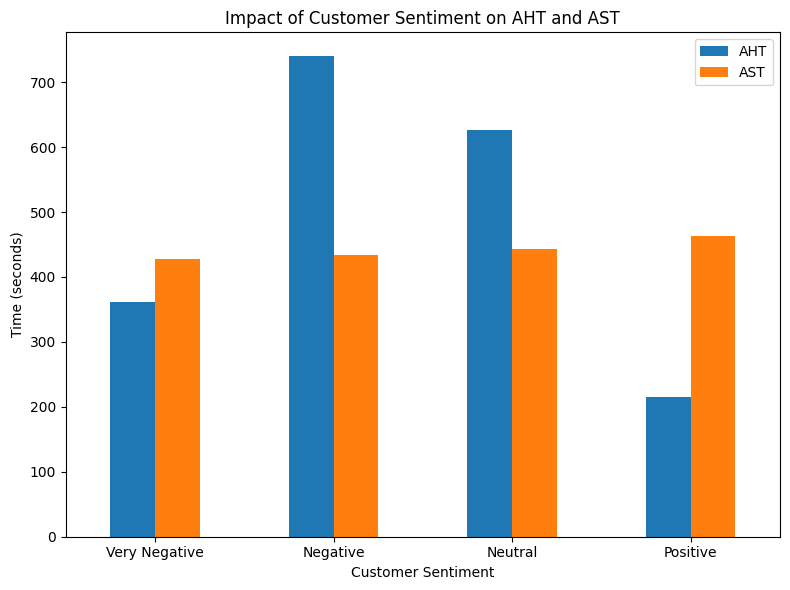

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
aht_ast_by_reason['AHT'].plot(kind='bar')
plt.title('Average Handle Time (AHT) by Call Reason')
plt.xlabel('Call Reason')
plt.ylabel('Average Handle Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
aht_ast_by_reason['AST'].plot(kind='bar')
plt.title('Average Speed to Answer (AST) by Call Reason')
plt.xlabel('Call Reason')
plt.ylabel('Average Speed to Answer (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

aht_ast_by_sentiment[['AHT', 'AST']].plot(kind='bar', figsize=(8, 6))
plt.title('Impact of Customer Sentiment on AHT and AST')
plt.xlabel('Customer Sentiment')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## PART B:

We often observe self-solvable issues unnecessarily escalating to agents, increasing their workload. Analyse the transcripts and call reasons to identify granular reasons associated to recurring problems that could be resolved via self-service options in the IVR system. Propose specific improvements to the IVR options to effectively reduce agent intervention in these cases, along with solid reasoning to support your recommendations.

Analyzed the frequency of call reasons related to potentially self-solvable issues. The values in self solvable list was selected manually based me and my partner's assumptions. 

Filtered the dataset to focus on these reasons                                                                                              Extracted keywords from the call transcripts to identify recurring issues
Here we focused on common keywords like 'change', 'cancel', 'seat', 'status', 'baggage'

In [16]:
self_solvable_reasons = ['Booking', 'Voluntary Change', 'Seating', 'Baggage', 'Check-In', 'Schedule Change']

# Filter the dataset to focus on these reasons
self_solvable_calls = merged_df[merged_df['primary_call_reason'].isin(self_solvable_reasons)]

# Extract keywords from the call transcripts to identify recurring issues
# Here we focus on common keywords like 'change', 'cancel', 'seat', 'status', 'baggage'
self_solvable_calls['keywords'] = self_solvable_calls['call_transcript'].str.lower().str.extract('(change|cancel|seat|status|baggage)', expand=False)

keyword_analysis = self_solvable_calls.groupby('keywords').size().sort_values(ascending=False)

print(keyword_analysis)


keywords
change     15583
cancel      3232
seat        2611
status       915
baggage      373
dtype: int64


C:\Users\Nihar\AppData\Local\Temp\ipykernel_740\3100884457.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_solvable_calls['keywords'] = self_solvable_calls['call_transcript'].str.lower().str.extract('(change|cancel|seat|status|baggage)', expand=False)


## SOME VISUALISATIONS

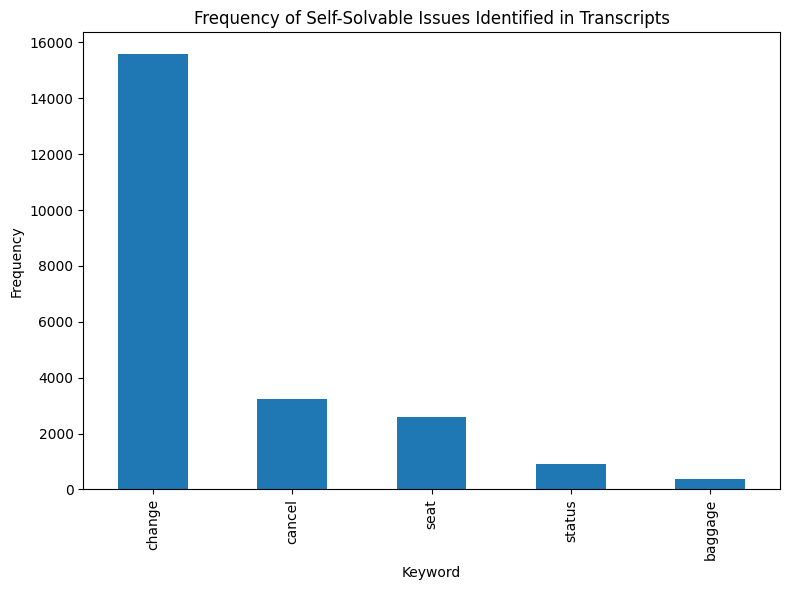

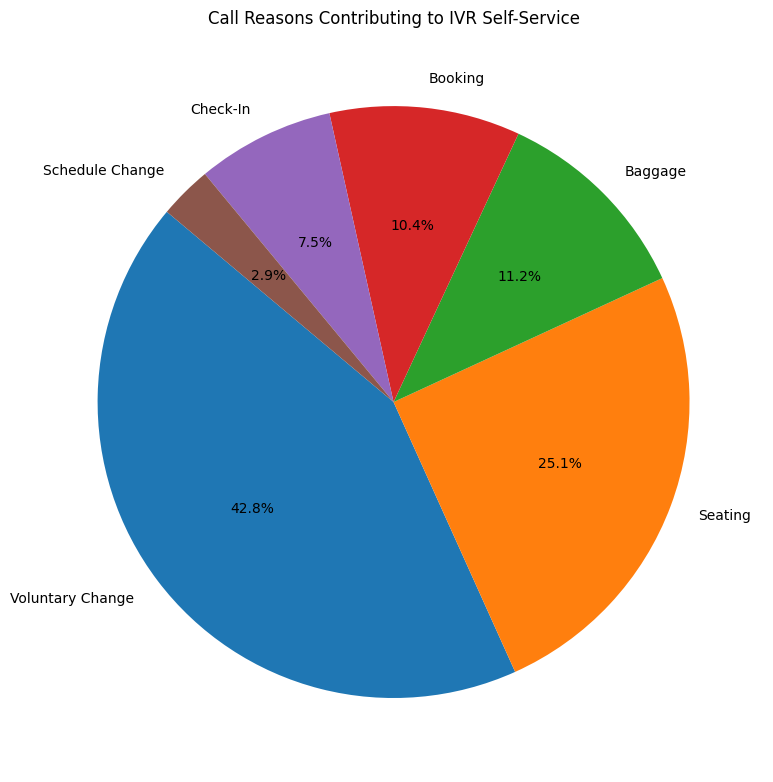

In [19]:
plt.figure(figsize=(8, 6))
keyword_analysis.plot(kind='bar')
plt.title('Frequency of Self-Solvable Issues Identified in Transcripts')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
self_solvable_calls['primary_call_reason'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Call Reasons Contributing to IVR Self-Service')
plt.ylabel('')  
plt.tight_layout()
plt.show()
